### Bar plots of the Graph Metrics for all Clusters in 250 iterations

In [1]:
%matplotlib inline

import os
import pickle
import matplotlib.pyplot as plt

In [2]:
# DNp01 (giant fiber) to DNp11
body_ids = ["2307027729","5813024015", "1565846637", "1405231475", "1466998977", "5813023322", "1100404581", "1226887763", "1228264951", "512851433", "5813026936", "1281324958"]
DNp_ids = [int(i) for i in body_ids]

In [3]:
metricName = 'eigenCentrality'

In [4]:
# make sub-directories in figures/ for each metricName
if not os.path.exists('./figures/' + metricName):
    os.makedirs('./figures/' + metricName)

In [5]:
with open(f'./data/{metricName}.pkl', 'rb') as handle:
    graphMetric = pickle.load(handle)

5813026936 0.4565727699530516
1565846637 0.1936619718309859
1100404581 0.31572769953051644
512851433 0.33039906103286387
1226887763 0.2863813229571985
5813023322 0.5929961089494163
1228264951 0.3408560311284047
1466998977 0.16356877323420074
1405231475 0.2983271375464684
2307027729 0.5650557620817843
5813024015 0.5306691449814126
1281324958 0.483271375464684


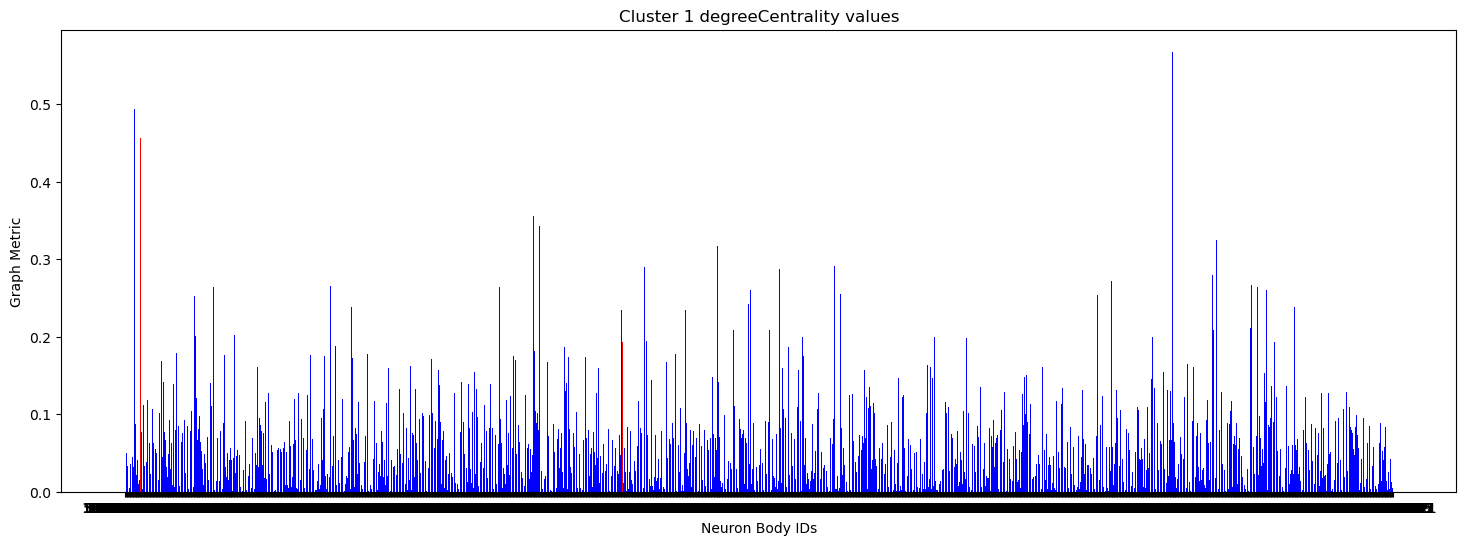

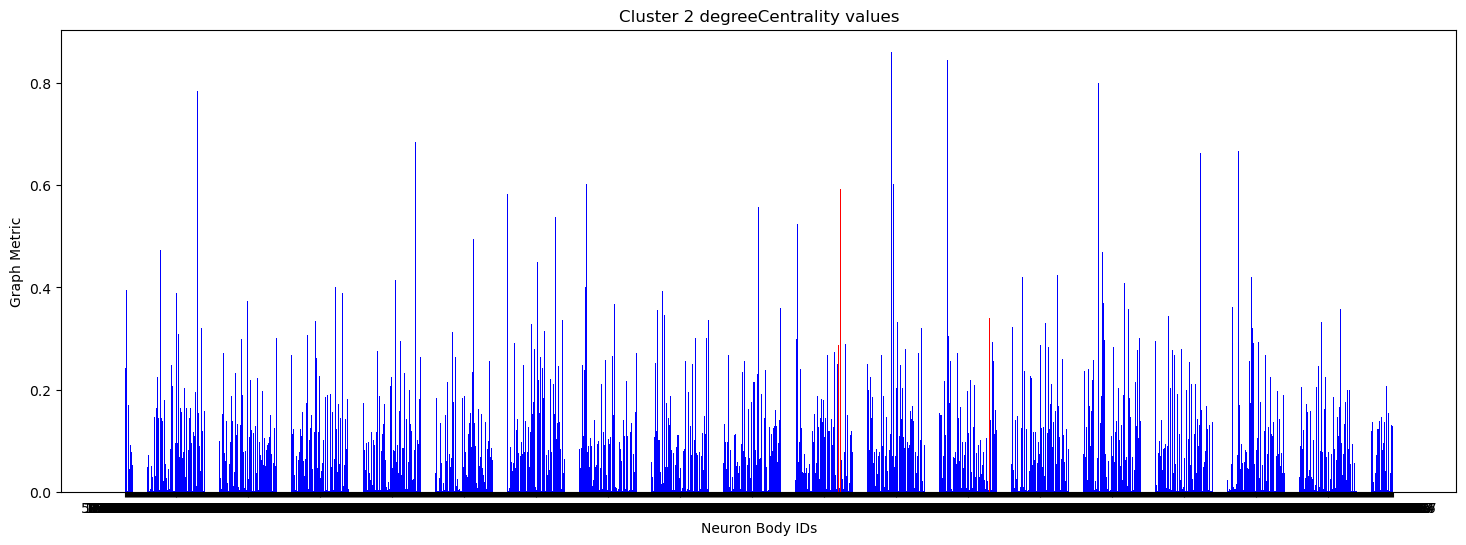

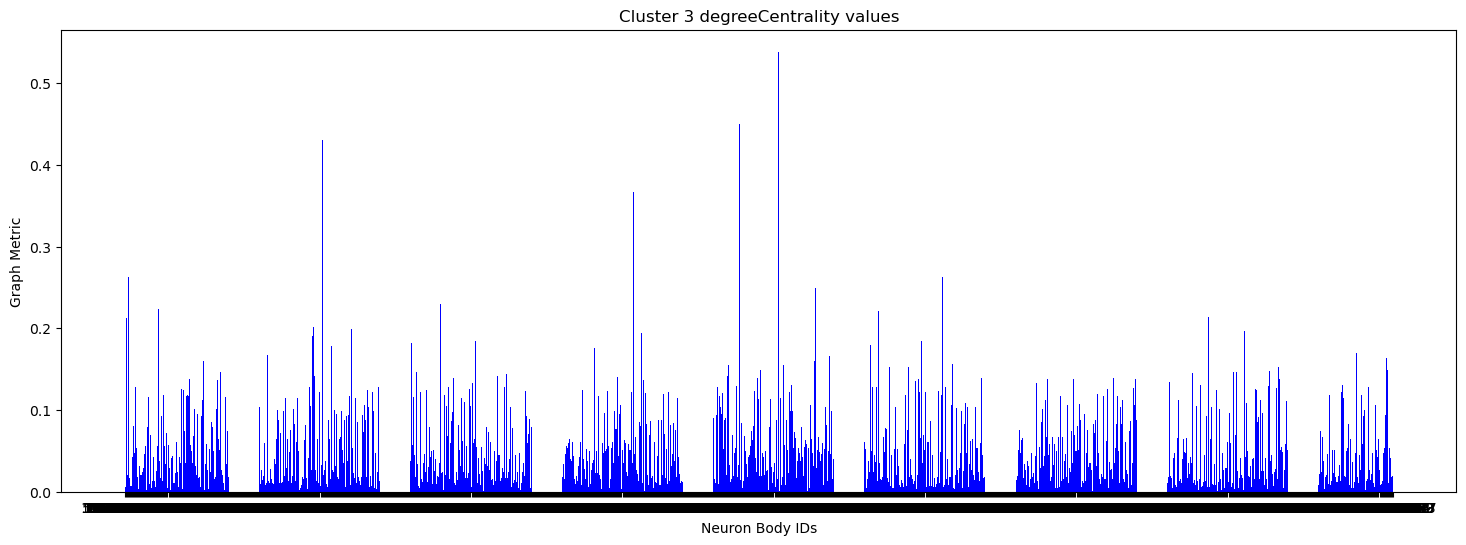

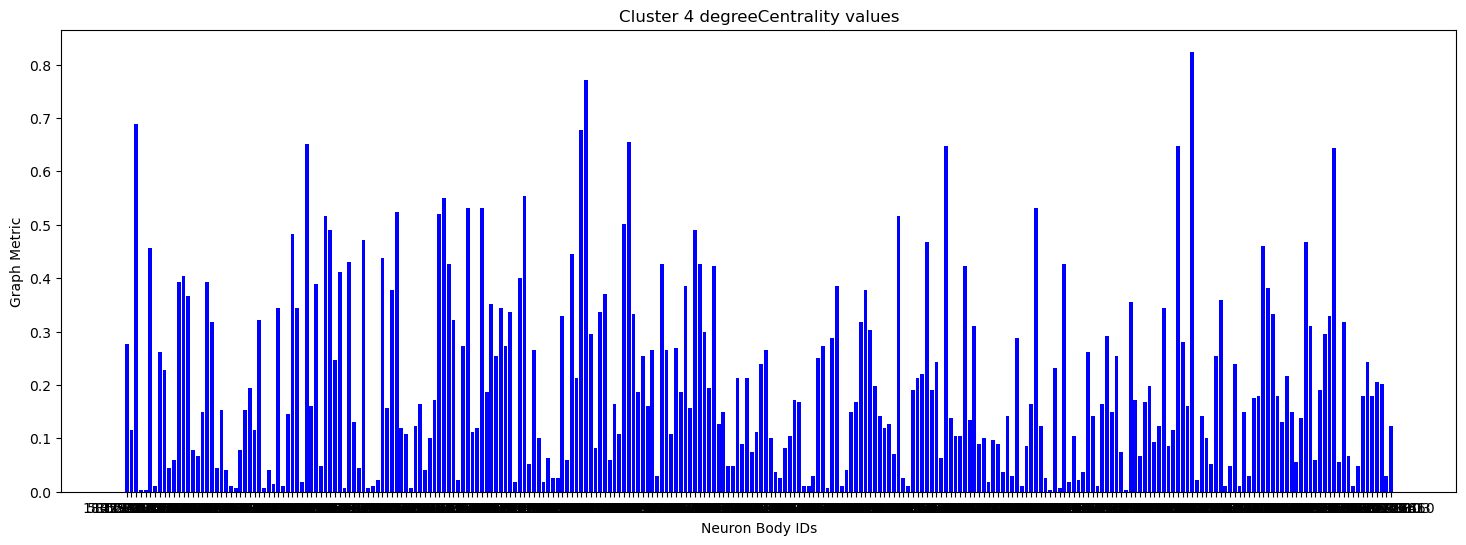

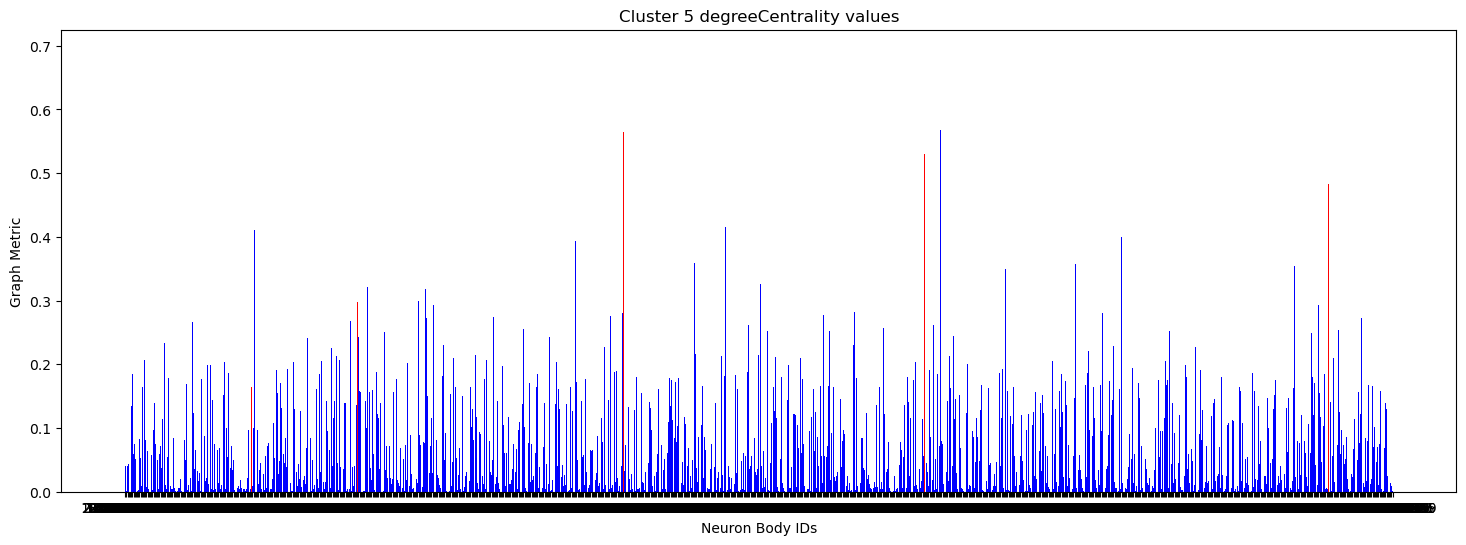

In [6]:
iter250 = graphMetric[250]

for i in range(len(iter250)):
    plt.figure(figsize=(18, 6))
    subject_ids, graphMetric_values = list(iter250[i].keys()), list(iter250[i].values())

    # Convert subject_ids to strings
    subject_ids = [str(id) for id in subject_ids]

    # Plot each bar individually, checking if it should be highlighted
    for id, value in zip(subject_ids, graphMetric_values):
        if id in body_ids:
            print(id, value)
            plt.bar(id, value, color='red')  # color the highlight bars red
        else:
            plt.bar(id, value, color='blue')

    plt.title(f'Cluster {i+1} {metricName} values')
    plt.xlabel('Neuron Body IDs')
    plt.ylabel('Graph Metric')
    plt.savefig(f'./figures/{metricName}/cluster{i+1}.png')
    # plt.show()

5813026936 0.4565727699530516
1565846637 0.1936619718309859
1100404581 0.31572769953051644
512851433 0.33039906103286387
1226887763 0.2863813229571985
5813023322 0.5929961089494163
1228264951 0.3408560311284047
1466998977 0.16356877323420074
1405231475 0.2983271375464684
2307027729 0.5650557620817843
5813024015 0.5306691449814126
1281324958 0.483271375464684


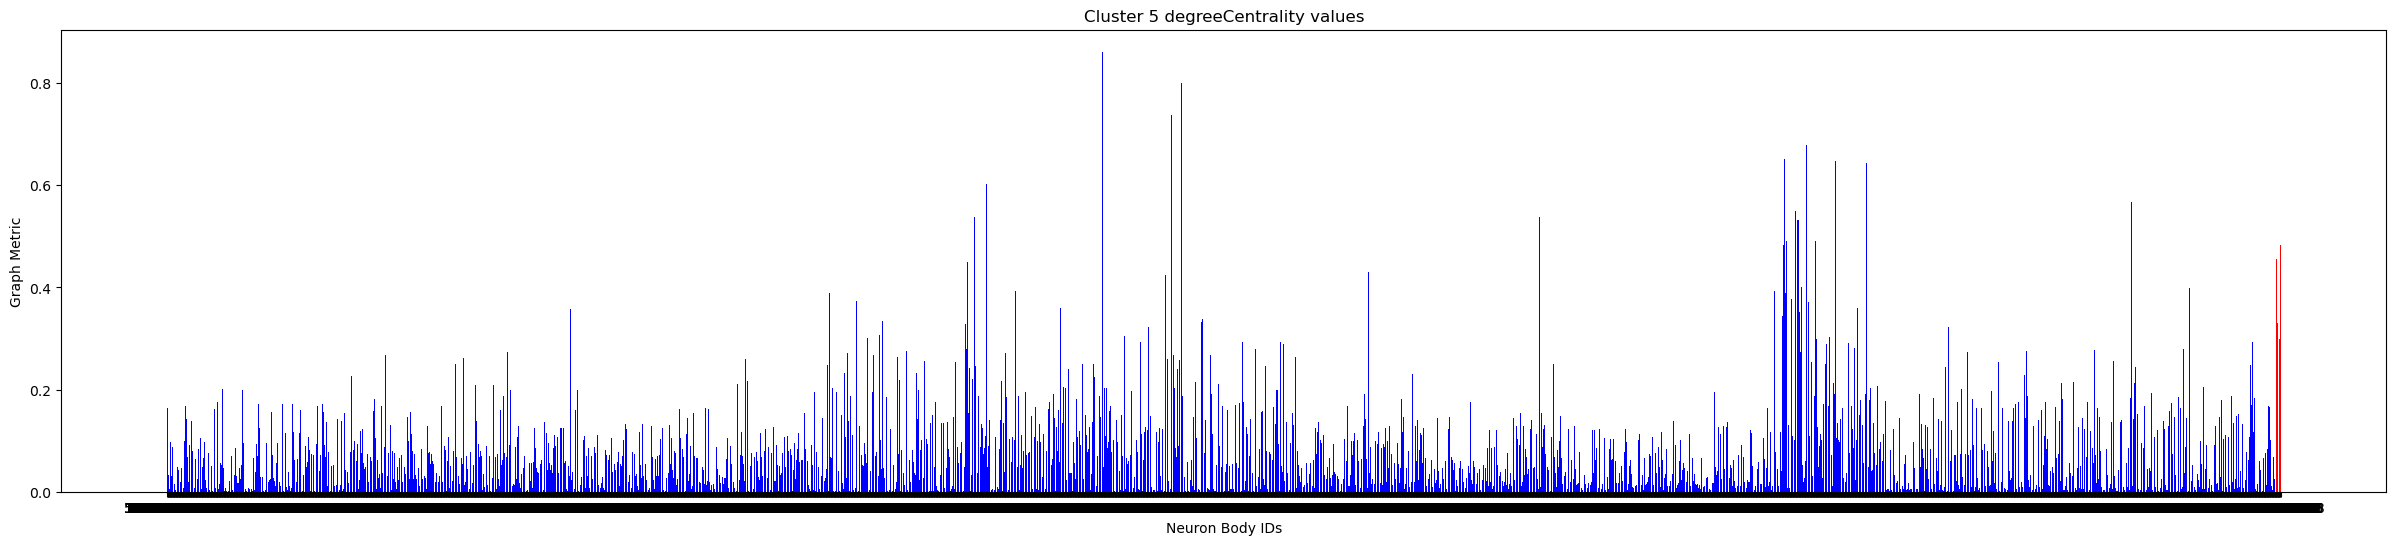

In [7]:
# plot all clusters in one figure

iter250 = graphMetric[250]
subject_ids, graphMetric_values = [], []
for i in range(len(iter250)):
    subject_ids.extend(list(iter250[i].keys()))
    graphMetric_values.extend(list(iter250[i].values()))

# scale graphMetric_values by 1000
# graphMetric_values = [i*1000 for i in graphMetric_values]

# Convert subject_ids to strings
subject_ids = [str(id) for id in subject_ids]

plt.figure(figsize=(30, 6))

# Plot each bar individually, checking if it should be highlighted
for id, value in zip(subject_ids, graphMetric_values):
    if id not in body_ids:
        plt.bar(id, value, color='blue')

for id, value in zip(subject_ids, graphMetric_values):
    if id in body_ids:
        print(id, value)
        plt.bar(id, value, color='red')  # color the highlight bars red

plt.title(f'Cluster {i+1} {metricName} values')
plt.xlabel('Neuron Body IDs')
plt.ylabel('Graph Metric')
# plt.savefig(f'./figures/{metricName}/cluster{i+1}.png')
plt.show()

In [8]:
min(graphMetric_values), max(graphMetric_values), sum(graphMetric_values)/len(graphMetric_values)

(0.0005868544600938967, 0.8614785992217899, 0.08009316819289714)